In [11]:
import matplotlib
import os
import pandas as pd
import numpy as np
import xarray as xr
from eofs.xarray import Eof
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cf
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FormatStrFormatter

### Read EOF data = ===========================================================
pth='D:/HEAT/DATA/EOFs/'
IAP_700=np.load(pth+'EOF_IAP_700m.npy',allow_pickle=True)
GECCO_700=np.load(pth+'EOF_GECCO_700m.npy',allow_pickle=True)
pc_IAP=IAP_700.item().get('pcs')
pc_GECCO=GECCO_700.item().get('pcs')

### Read data index ===========================================================
ORI=pd.read_csv('D:/HEAT/Signals/MEI_ori.csv',header=None)
MEI_index=ORI.values.flatten()
MEI_index[MEI_index<-100]=np.nan
MEI_index=MEI_index[:-8]
mei_2Y=pd.DataFrame({'mei':MEI_index}).rolling(12,center=True).mean()[6:-57]

### Create time index =========================================================
TIME=pd.date_range('1980-07',periods=len(pc_IAP),freq='m')[:457]


In [2]:
### defines ===================================================================
def plot_pcs(time,time2,pc,t_name,w_path,save_name,fig_bool=True):
    Label_size = 18
    fig, axs = plt.subplots(1,1,figsize=(10,3.7),constrained_layout = True,
                        dpi=200)
    f1 = axs.plot(time,pc, label='KINETIC_ENRG',color='k',linewidth=2,zorder=0)
    axs.set_title(t_name,loc='right',fontdict={'fontsize':20,'fontweight':'regular','fontstyle':'italic'})
    axs.tick_params(axis='both', labelsize=Label_size)
    axs.grid(axis='x',linestyle='-.')
    xtick_location = time[5::12*4]
    xtick_labels = time2[5::12*4]
    axs.set_xticks(ticks=xtick_location)
    axs.set_xticklabels(xtick_labels, rotation=0, fontsize=Label_size, alpha=1)
    axs.tick_params(axis='x', direction='in', length=6, pad=8, labelsize=Label_size, labelcolor='k', top=True,width=1.)
    axs.tick_params(axis='y', direction='in', length=6, pad=8, labelsize=Label_size-3, width=1., color='k')
    plt.tight_layout()
    if fig_bool:
        plt.savefig(w_path+Dir_pth+'/ppt/'+save_name,
                facecolor='none',edgecolor='none',bbox_inches='tight',transparent=True)
        plt.savefig(w_path+Dir_pth+'/'+save_name,bbox_inches='tight')
    plt.show()
plt.rcParams["font.family"] = 'Arial'

C:\Users\shjo9\AppData\Local\Temp\ipykernel_19620\2726241271.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


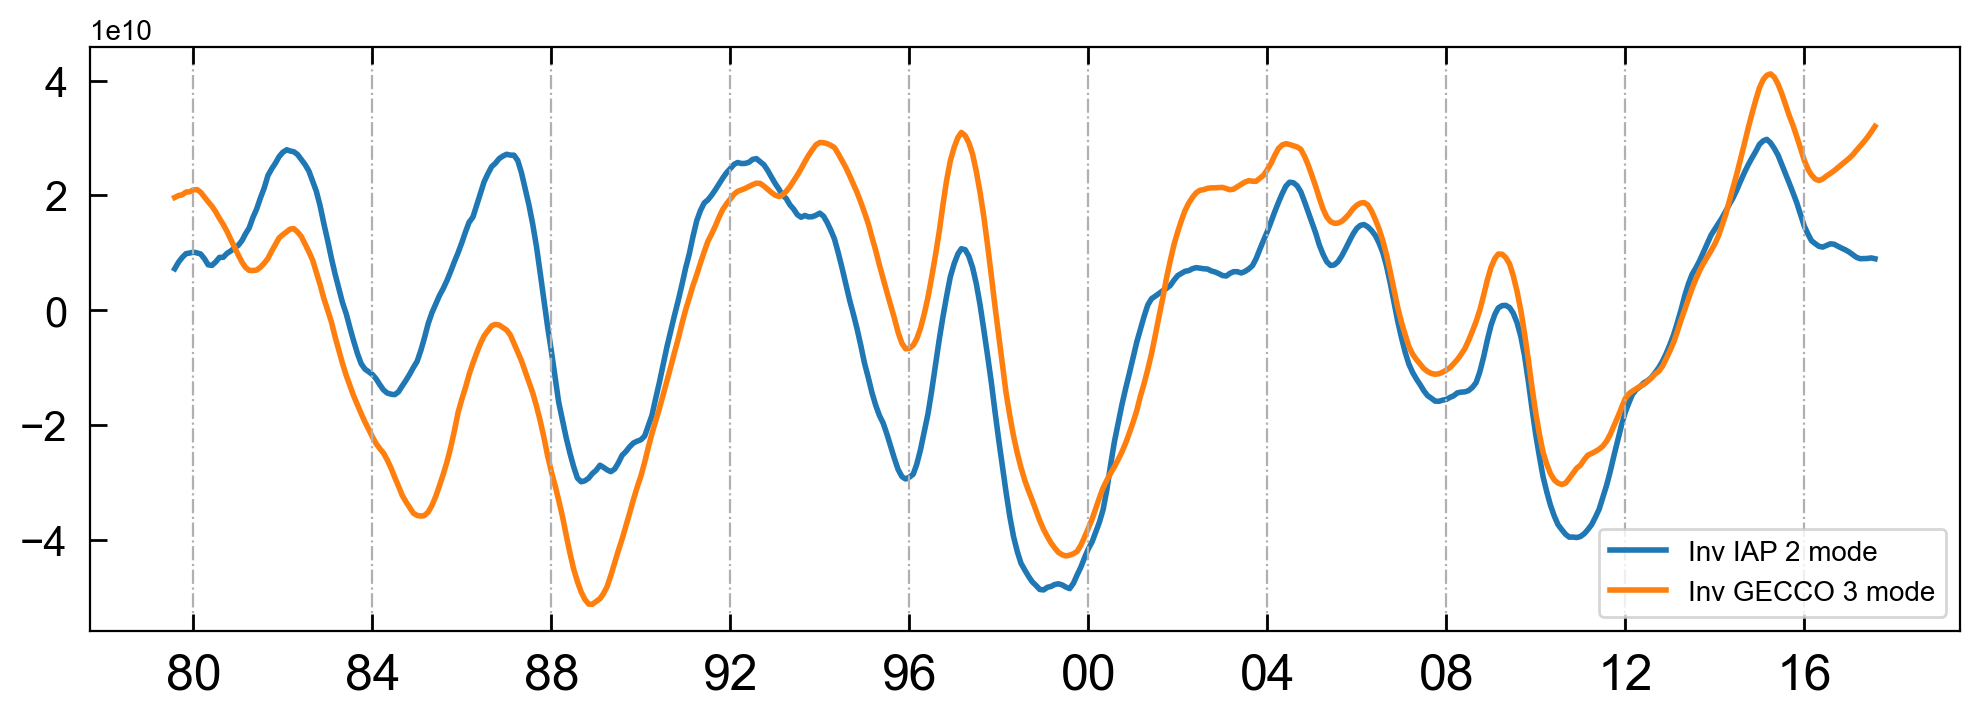

In [13]:
Label_size = 18; plt.rcParams["font.family"] = 'Arial'
TIMEL=TIME.strftime('%y')

iap=-pc_IAP[:457,1]
gec=-pc_GECCO[:,2]

### Plot figure ===============================================================
fig, axs = plt.subplots(1,1,figsize=(10,3.7),constrained_layout = True,
                    dpi=200)
f1 = axs.plot(TIME,iap, label='Inv IAP 2 mode',color='C0',linewidth=2,zorder=0)
f1 = axs.plot(TIME,gec, label='Inv GECCO 3 mode',color='C1',linewidth=2,zorder=0)
#axs.set_title(t_name,loc='right',fontdict={'fontsize':20,'fontweight':'regular','fontstyle':'italic'})
axs.tick_params(axis='both', labelsize=Label_size)
axs.grid(axis='x',linestyle='-.')
xtick_location = TIME[5::12*4]
xtick_labels = TIMEL[5::12*4]
axs.set_xticks(ticks=xtick_location)
axs.set_xticklabels(xtick_labels, rotation=0, fontsize=Label_size, alpha=1)
axs.tick_params(axis='x', direction='in', length=6, pad=8, labelsize=Label_size, labelcolor='k', top=True,width=1.)
axs.tick_params(axis='y', direction='in', length=6, pad=8, labelsize=Label_size-3, width=1., color='k')
plt.legend(loc='lower right')
plt.tight_layout()
if 0:
    plt.savefig(w_path+Dir_pth+'/ppt/'+save_name,
            facecolor='none',edgecolor='none',bbox_inches='tight',transparent=True)
    plt.savefig(w_path+Dir_pth+'/'+save_name,bbox_inches='tight')
plt.show()



In [17]:
iap_st=(iap-iap.mean())/iap.std()
gec_st=(gec-gec.mean())/gec.std()
mei_st=(mei_2Y-mei_2Y.mean())/mei_2Y.std()

C:\Users\shjo9\AppData\Local\Temp\ipykernel_19620\2516068880.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


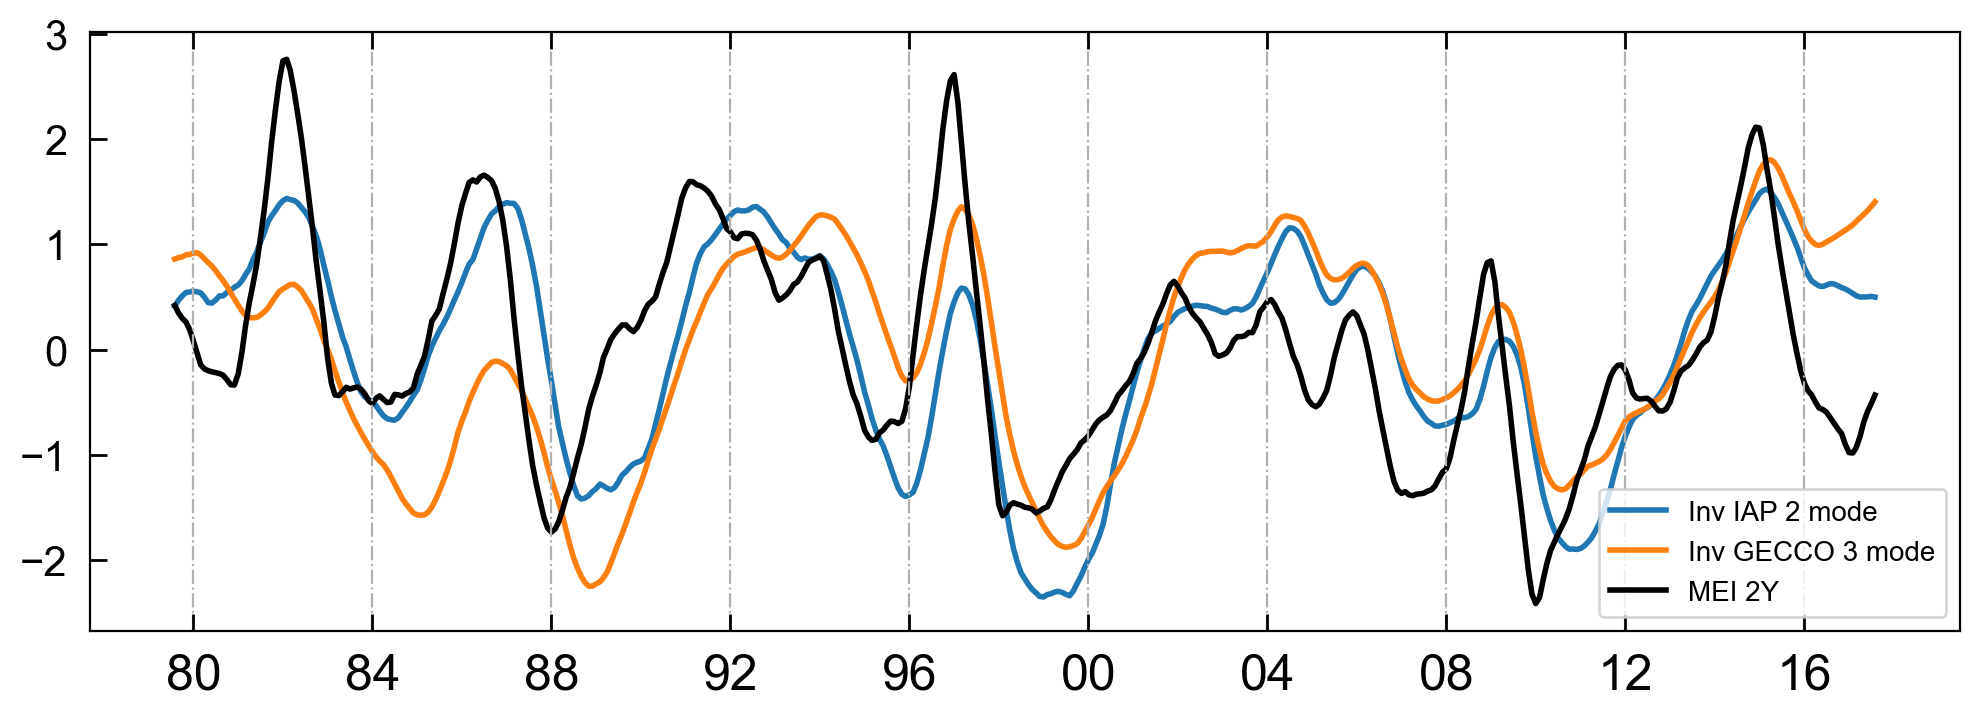

In [22]:
### Plot figure ===============================================================
fig, axs = plt.subplots(1,1,figsize=(10,3.7),constrained_layout = True,
                    dpi=200)
f1 = axs.plot(TIME,iap_st, label='Inv IAP 2 mode',color='C0',linewidth=2,zorder=0)
f2 = axs.plot(TIME,gec_st, label='Inv GECCO 3 mode',color='C1',linewidth=2,zorder=0)
f3 = axs.plot(TIME,mei_st, label='MEI 2Y',color='k',linewidth=2.,zorder=0)
#axs.set_title(t_name,loc='right',fontdict={'fontsize':20,'fontweight':'regular','fontstyle':'italic'})
axs.tick_params(axis='both', labelsize=Label_size)
axs.grid(axis='x',linestyle='-.')
xtick_location = TIME[5::12*4]
xtick_labels = TIMEL[5::12*4]
axs.set_xticks(ticks=xtick_location)
axs.set_xticklabels(xtick_labels, rotation=0, fontsize=Label_size, alpha=1)
axs.tick_params(axis='x', direction='in', length=6, pad=8, labelsize=Label_size, labelcolor='k', top=True,width=1.)
axs.tick_params(axis='y', direction='in', length=6, pad=8, labelsize=Label_size-3, width=1., color='k')
plt.legend(loc='lower right')
plt.tight_layout()
if 0:
    plt.savefig(w_path+Dir_pth+'/ppt/'+save_name,
            facecolor='none',edgecolor='none',bbox_inches='tight',transparent=True)
    plt.savefig(w_path+Dir_pth+'/'+save_name,bbox_inches='tight')
plt.show()


In [25]:
iap_st.std()

0.99999994

C:\Users\shjo9\AppData\Local\Temp\ipykernel_19620\3020466808.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


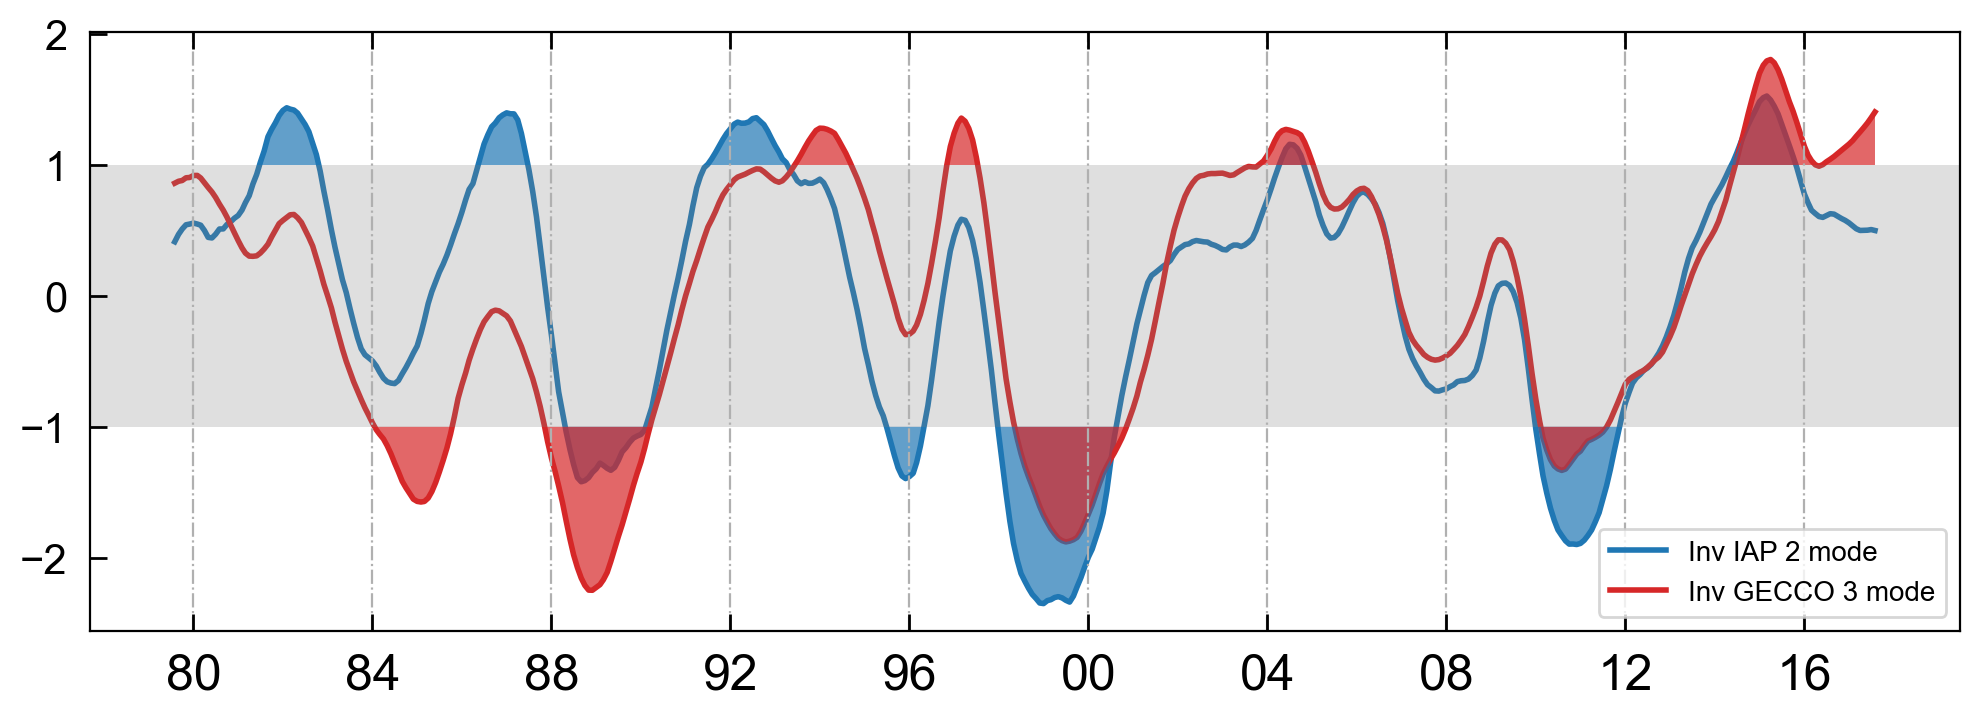

In [46]:
### Plot figure 1/2 STD ===============================================================

STD=1.

fig, axs = plt.subplots(1,1,figsize=(10,3.7),constrained_layout = True,
                    dpi=200)
f1 = axs.plot(TIME,iap_st, label='Inv IAP 2 mode',color='C0',linewidth=2,zorder=0)
f2 = axs.plot(TIME,gec_st, label='Inv GECCO 3 mode',color='C3',linewidth=2,zorder=0)

### iap =======================================================================
axs.fill_between(TIME,STD,iap_st,where=iap_st >= STD,
                 facecolor='C0', interpolate=True,alpha=.7)
axs.fill_between(TIME,-STD,iap_st,where=iap_st <= -STD,
                 facecolor='C0', interpolate=True,alpha=.7)
### iap =======================================================================
axs.fill_between(TIME,STD,gec_st,where=gec_st >= STD,
                 facecolor='C3', interpolate=True,alpha=.7)
axs.fill_between(TIME,-STD,gec_st,where=gec_st <= -STD,
                 facecolor='C3', interpolate=True,alpha=.7)

axs.axhspan(-STD,STD, facecolor='0.5', alpha=0.25)
#f3 = axs.plot(TIME,mei_st, label='MEI 2Y',color='k',linewidth=2.,zorder=0)
#axs.set_title(t_name,loc='right',fontdict={'fontsize':20,'fontweight':'regular','fontstyle':'italic'})
axs.tick_params(axis='both', labelsize=Label_size)
axs.grid(axis='x',linestyle='-.')
xtick_location = TIME[5::12*4]
xtick_labels = TIMEL[5::12*4]
axs.set_xticks(ticks=xtick_location)
axs.set_xticklabels(xtick_labels, rotation=0, fontsize=Label_size, alpha=1)
axs.tick_params(axis='x', direction='in', length=6, pad=8, labelsize=Label_size, labelcolor='k', top=True,width=1.)
axs.tick_params(axis='y', direction='in', length=6, pad=8, labelsize=Label_size-3, width=1., color='k')
plt.legend(loc='lower right')
plt.tight_layout()
if 0:
    plt.savefig(w_path+Dir_pth+'/ppt/'+save_name,
            facecolor='none',edgecolor='none',bbox_inches='tight',transparent=True)
    plt.savefig(w_path+Dir_pth+'/'+save_name,bbox_inches='tight')
plt.show()

C:\Users\shjo9\AppData\Local\Temp\ipykernel_19620\1708515154.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


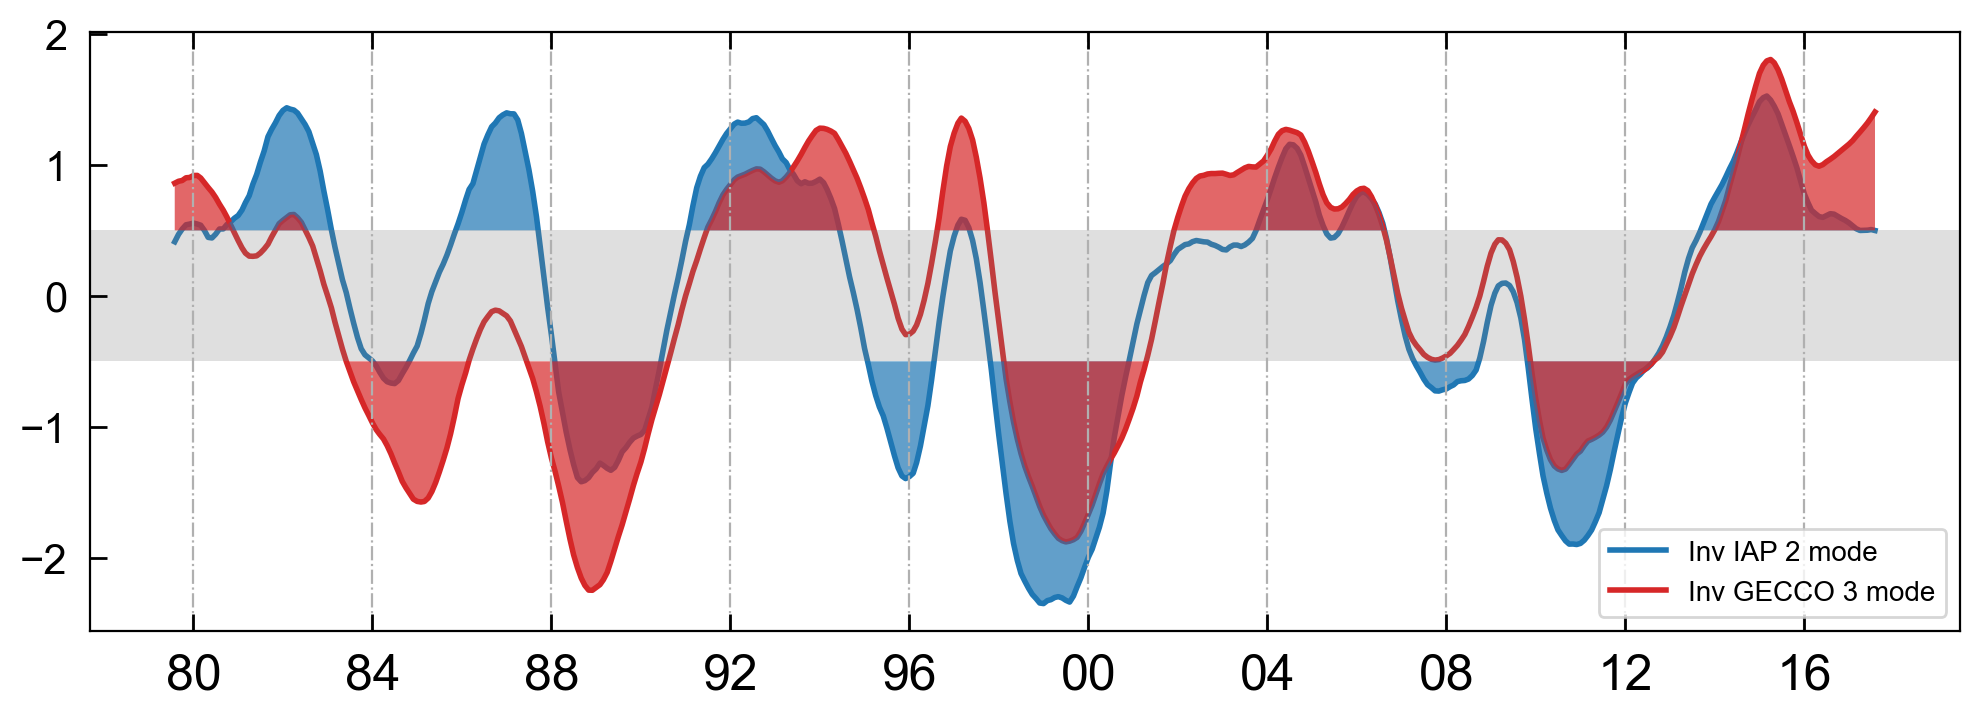

In [45]:
### Plot figure 1/2 STD ===============================================================

STD=.5

fig, axs = plt.subplots(1,1,figsize=(10,3.7),constrained_layout = True,
                    dpi=200)
f1 = axs.plot(TIME,iap_st, label='Inv IAP 2 mode',color='C0',linewidth=2,zorder=0)
f2 = axs.plot(TIME,gec_st, label='Inv GECCO 3 mode',color='C3',linewidth=2,zorder=0)

### iap =======================================================================
axs.fill_between(TIME,STD,iap_st,where=iap_st >= STD,
                 facecolor='C0', interpolate=True,alpha=.7)
axs.fill_between(TIME,-STD,iap_st,where=iap_st <= -STD,
                 facecolor='C0', interpolate=True,alpha=.7)
### iap =======================================================================
axs.fill_between(TIME,STD,gec_st,where=gec_st >= STD,
                 facecolor='C3', interpolate=True,alpha=.7)
axs.fill_between(TIME,-STD,gec_st,where=gec_st <= -STD,
                 facecolor='C3', interpolate=True,alpha=.7)

axs.axhspan(-STD,STD, facecolor='0.5', alpha=0.25)
#f3 = axs.plot(TIME,mei_st, label='MEI 2Y',color='k',linewidth=2.,zorder=0)
#axs.set_title(t_name,loc='right',fontdict={'fontsize':20,'fontweight':'regular','fontstyle':'italic'})
axs.tick_params(axis='both', labelsize=Label_size)
axs.grid(axis='x',linestyle='-.')
xtick_location = TIME[5::12*4]
xtick_labels = TIMEL[5::12*4]
axs.set_xticks(ticks=xtick_location)
axs.set_xticklabels(xtick_labels, rotation=0, fontsize=Label_size, alpha=1)
axs.tick_params(axis='x', direction='in', length=6, pad=8, labelsize=Label_size, labelcolor='k', top=True,width=1.)
axs.tick_params(axis='y', direction='in', length=6, pad=8, labelsize=Label_size-3, width=1., color='k')
plt.legend(loc='lower right')
plt.tight_layout()
if 0:
    plt.savefig(w_path+Dir_pth+'/ppt/'+save_name,
            facecolor='none',edgecolor='none',bbox_inches='tight',transparent=True)
    plt.savefig(w_path+Dir_pth+'/'+save_name,bbox_inches='tight')
plt.show()

In [61]:
### Find time coord 4 Composite ===============================================================
iap_posi_1std=TIME[np.where(iap_st>=1)]
iap_nega_1std=TIME[np.where(iap_st<=-1)]

iap_posi_05std=TIME[np.where(iap_st>=.5)]
iap_nega_05std=TIME[np.where(iap_st<=-.5)]

gec_posi_1std=TIME[np.where(gec_st>=1)]
gec_nega_1std=TIME[np.where(gec_st<=-1)]

gec_posi_05std=TIME[np.where(gec_st>=.5)]
gec_nega_05std=TIME[np.where(gec_st<=-.5)]

In [55]:
pd.DatetimeIndex(['1990-01-01'])

DatetimeIndex(['1990-01-01'], dtype='datetime64[ns]', freq=None)

In [63]:
### save coords ===============================================================
import pickle
indx_pth='D:/HEAT/DATA/EOFs/'

iap_index = {'iap_posi_1std':iap_posi_1std,'iap_nega_1std':iap_nega_1std,\
    'iap_posi_05std':iap_posi_05std,'iap_nega_05std':iap_nega_05std}
gec_index = {'gec_posi_1std':gec_posi_1std,'gec_nega_1std':gec_nega_1std,\
    'gec_posi_05std':gec_posi_05std,'gec_nega_05std':gec_nega_05std}

with open(indx_pth+'iap_coord.pickle', 'wb') as f:
    pickle.dump(iap_index, f, pickle.HIGHEST_PROTOCOL)
with open(indx_pth+'gec_coord.pickle', 'wb') as f:
    pickle.dump(iap_index, f, pickle.HIGHEST_PROTOCOL)


In [64]:
### load coords ===============================================================
with open(indx_pth+'iap_coord.pickle', 'rb') as f:
    iap_index = pickle.load(f)
with open(indx_pth+'gec_coord.pickle', 'rb') as f:
    gec_index = pickle.load(f)

In [ ]:
gec_index.keys()

dict_keys(['iap_posi_1std', 'iap_nega_1std', 'iap_posi_05std', 'iap_nega_05std'])